In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import pickle
from time_series_split import *

In [2]:
print(type(metrics))

<class 'module'>


In [3]:
def calculate_aqi(pm25):
    ranges = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 500.0, 301, 500),
    ]
    for c_low, c_high, aqi_low, aqi_high in ranges:
        if c_low <= pm25 <= c_high:
            return round((aqi_high - aqi_low) / (c_high - c_low) * (pm25 - c_low) + aqi_low)
    return 500  # default n·∫øu v∆∞·ª£t ng∆∞·ª°ng

def aqi_class(aqi):
    if aqi <= 50: return 0
    elif aqi <= 100: return 1
    elif aqi <= 150: return 2
    elif aqi <= 200: return 3
    elif aqi <= 300: return 4
    else: return 5

In [4]:
combined_data = pd.read_csv('/home/thu/INT3041E_AI_PM2.5-Concentration-Estimation/data/add_AQI.csv')
combined_data.head()

time   ID        pm25        lat         lon  SQRT_SEA_DEM_LAT  \
0  2020-01-01   19  116.949130  21.049750  105.741870          5.922647   
1  2020-01-01   79  105.103043  21.015250  105.800130          4.307231   
2  2020-01-01  163  118.285100  21.024347  106.017288          4.988467   
3  2020-01-01  300  116.739130  21.023532  105.853941          4.865087   
4  2020-01-02   19   76.856667  21.049750  105.741870          5.922647   

       WSPD        WDIR        TMP         TX  ...      NDVI        CO  \
0  1.136119  145.942749  20.811243  23.219995  ...  0.000551  0.045586   
1  1.136119  145.942749  20.811243  23.219995  ... -0.003006  0.041913   
2  0.651509  145.395233  20.677492  23.029993  ...  0.004388  0.042329   
3  1.136119  145.942749  20.811243  23.219995  ... -0.001733  0.041913   
4  2.744283  147.084442  22.176249  25.119989  ...  0.016035  0.042298   

       HCHO       NO2       SO2     CLOUD        O3       AAI  AQI  AQI_Class  
0  0.000060  0.000072  0.000035  0.711612  0.101653 -0.836203  183          3  
1  0.000107  0.000086  0.000056  0.761720  0.103635 -0.718537  177          3  
2  0.000108  0.000071  0.000026  0.867689  0.102144 -0.942304  183          3  
3  0.000097  0.000085  0.000079  0.779294  0.102875 -0.692613  183          3  
4  0.000115  0.000082 -0.000345  0.705396  0.103488 -1.119681  162          3  

[5 rows x 24 columns]

In [5]:
# T√≠nh c·ªôt AQI t·ª´ PM2.5
combined_data['AQI'] = combined_data['pm25'].apply(calculate_aqi)
# G√°n nh√£n l·ªõp AQI
combined_data['AQI_Class'] = combined_data['AQI'].apply(aqi_class)

In [6]:
combined_data.head()

time   ID        pm25        lat         lon  SQRT_SEA_DEM_LAT  \
0  2020-01-01   19  116.949130  21.049750  105.741870          5.922647   
1  2020-01-01   79  105.103043  21.015250  105.800130          4.307231   
2  2020-01-01  163  118.285100  21.024347  106.017288          4.988467   
3  2020-01-01  300  116.739130  21.023532  105.853941          4.865087   
4  2020-01-02   19   76.856667  21.049750  105.741870          5.922647   

       WSPD        WDIR        TMP         TX  ...      NDVI        CO  \
0  1.136119  145.942749  20.811243  23.219995  ...  0.000551  0.045586   
1  1.136119  145.942749  20.811243  23.219995  ... -0.003006  0.041913   
2  0.651509  145.395233  20.677492  23.029993  ...  0.004388  0.042329   
3  1.136119  145.942749  20.811243  23.219995  ... -0.001733  0.041913   
4  2.744283  147.084442  22.176249  25.119989  ...  0.016035  0.042298   

       HCHO       NO2       SO2     CLOUD        O3       AAI  AQI  AQI_Class  
0  0.000060  0.000072  0.000035  0.711612  0.101653 -0.836203  183          3  
1  0.000107  0.000086  0.000056  0.761720  0.103635 -0.718537  177          3  
2  0.000108  0.000071  0.000026  0.867689  0.102144 -0.942304  183          3  
3  0.000097  0.000085  0.000079  0.779294  0.102875 -0.692613  183          3  
4  0.000115  0.000082 -0.000345  0.705396  0.103488 -1.119681  162          3  

[5 rows x 24 columns]

In [7]:
# folds = split_original_data()
folds = split_consolidated_data()
print(f"Number of folds: {len(folds)}")

Number of folds: 3


**Best paramters**

Sau khi tuning th√¨ ƒë∆∞·ª£c Best parameters: {'n_estimators': 1200, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}


Tr∆∞·ªõc khi tuning:  F1-score = 0.67
Sau khi tuning: F1-score = 0.998

In [8]:
params = {
    'n_estimators': 1200,
    'max_features': 'log2',
    'max_depth': 15,
    'min_samples_split': 15,
    'min_samples_leaf': 2
}

# params = {
#     'n_estimators': 100,
#     'max_features': 'log2',
#     'max_depth': 5,
#     'min_samples_split': 10,
#     'min_samples_leaf': 10
# }

In [9]:
# Bi·∫øn l∆∞u nh√£n th·∫≠t v√† d·ª± ƒëo√°n tr√™n to√†n b·ªô test sets
all_y_true = []
all_y_pred = []

In [10]:
# Danh s√°ch ƒë·ªÉ l∆∞u k·∫øt qu·∫£ t·ª´ m·ªói fold
val_accuracies = []
test_accuracies = []
test_classification_reports = []

best_val_accuracy = 0
best_model = None

In [11]:
all_target_names = ['Good', 'Moderate', 'Unhealthy for Sensitive', 'Unhealthy', 'Very Unhealthy', 'Hazardous']


Processing Fold 1/3
Train Accuracy: 1.0000 | Validation Accuracy: 0.9945 | Test Accuracy: 0.9939


/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3

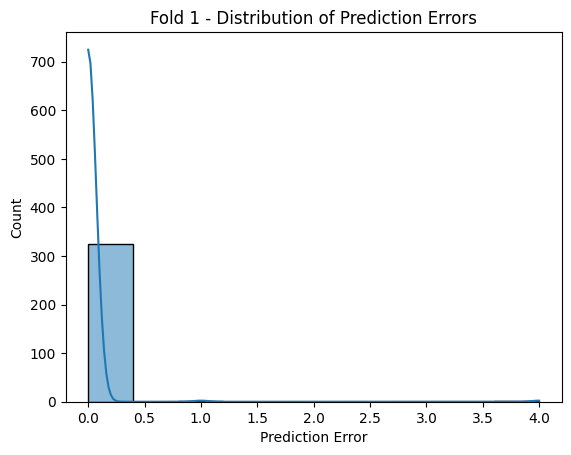


Processing Fold 2/3
Train Accuracy: 1.0000 | Validation Accuracy: 0.9939 | Test Accuracy: 1.0000


/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3

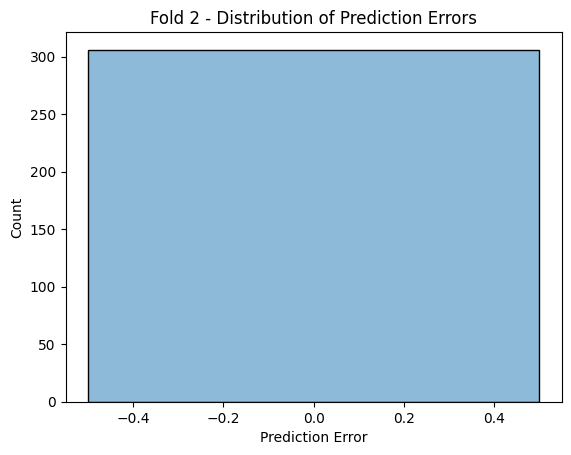


Processing Fold 3/3
Train Accuracy: 1.0000 | Validation Accuracy: 1.0000 | Test Accuracy: 1.0000


/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3

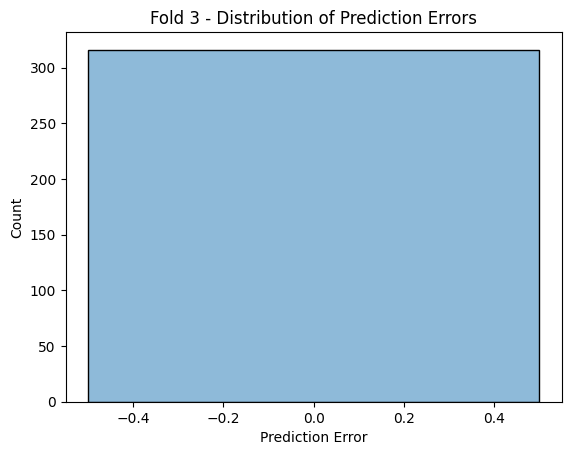

In [12]:
for i, fold in enumerate(folds):
    print(f"\nProcessing Fold {i+1}/{len(folds)}")

    train_data = fold['train']
    val_data = fold['validation']
    test_data = fold['test']

    feature_columns = train_data.columns[2:-2]
    X_train = train_data[feature_columns]
    y_train = train_data['AQI_Class']
    X_val = val_data[feature_columns]
    y_val = val_data['AQI_Class']
    X_test = test_data[feature_columns]
    y_test = test_data['AQI_Class']

    clf = RandomForestClassifier(**params, random_state=43, class_weight='balanced')
    clf.fit(X_train, y_train)

    train_acc = clf.score(X_train, y_train)
    val_acc = clf.score(X_val, y_val)
    test_acc = clf.score(X_test, y_test)

    print(f"Train Accuracy: {train_acc:.4f} | Validation Accuracy: {val_acc:.4f} | Test Accuracy: {test_acc:.4f}")

    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)

    if val_acc > best_val_accuracy:
        best_val_accuracy = val_acc
        best_model = clf

    y_pred = clf.predict(X_test)
    
    # L∆∞u nh√£n th·∫≠t v√† nh√£n d·ª± ƒëo√°n ƒë·ªÉ t√≠nh t·ªïng sau n√†y
    all_y_true.extend(y_test.tolist())
    all_y_pred.extend(y_pred.tolist())

    report = metrics.classification_report(y_test, y_pred, target_names=all_target_names, labels=[0,1,2,3,4,5], output_dict=True)
    test_classification_reports.append(report)

    # Bi·ªÉu ƒë·ªì sai s·ªë
    sns.histplot(y_test - y_pred, kde=True)
    plt.title(f'Fold {i+1} - Distribution of Prediction Errors')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.show()

In [13]:
mean_val_accuracy = np.mean(val_accuracies)
mean_test_accuracy = np.mean(test_accuracies)
print(f"\nAverage Validation Accuracy: {mean_val_accuracy:.4f}")
print(f"Average Test Accuracy: {mean_test_accuracy:.4f}")


Average Validation Accuracy: 0.9961
Average Test Accuracy: 0.9980


In [14]:
# B√°o c√°o trung b√¨nh t·ª´ng l·ªõp
avg_report = {}
for label in all_target_names:
    precisions = [r[label]['precision'] for r in test_classification_reports if label in r]
    recalls = [r[label]['recall'] for r in test_classification_reports if label in r]
    f1_scores = [r[label]['f1-score'] for r in test_classification_reports if label in r]
    supports = [r[label]['support'] for r in test_classification_reports if label in r]

    avg_report[label] = {
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'f1-score': np.mean(f1_scores),
        'support': sum(supports),
        'num_folds': len(precisions)
    }

# Weighted avg
avg_report['weighted avg'] = {
    'precision': np.mean([r['weighted avg']['precision'] for r in test_classification_reports]),
    'recall': np.mean([r['weighted avg']['recall'] for r in test_classification_reports]),
    'f1-score': np.mean([r['weighted avg']['f1-score'] for r in test_classification_reports]),
    'support': sum([r['weighted avg']['support'] for r in test_classification_reports])
}

In [15]:
# In ra report trung b√¨nh
print("\nüìã Average Classification Report:")
for label in sorted(avg_report.keys(), key=lambda x: x if x != 'weighted avg' else 'zzz'):
    print(f"{label}:")
    print(f"  Precision: {avg_report[label]['precision']:.4f}")
    print(f"  Recall: {avg_report[label]['recall']:.4f}")
    print(f"  F1-score: {avg_report[label]['f1-score']:.4f}")
    print(f"  Support: {avg_report[label]['support']:.0f}")
    if label != 'weighted avg':
        print(f"  Number of folds with this class: {avg_report[label]['num_folds']}")



üìã Average Classification Report:
Good:
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
  Support: 196
  Number of folds with this class: 3
Hazardous:
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  Support: 1
  Number of folds with this class: 3
Moderate:
  Precision: 0.9972
  Recall: 1.0000
  F1-score: 0.9986
  Support: 380
  Number of folds with this class: 3
Unhealthy:
  Precision: 1.0000
  Recall: 0.9912
  F1-score: 0.9956
  Support: 207
  Number of folds with this class: 3
Unhealthy for Sensitive:
  Precision: 0.9936
  Recall: 1.0000
  F1-score: 0.9968
  Support: 161
  Number of folds with this class: 3
Very Unhealthy:
  Precision: 0.3333
  Recall: 0.3333
  F1-score: 0.3333
  Support: 4
  Number of folds with this class: 3
weighted avg:
  Precision: 0.9970
  Recall: 0.9980
  F1-score: 0.9975
  Support: 949


In [16]:
# T√≠nh v√† in classification report t·ªïng t·∫•t c·∫£ sample
final_report = metrics.classification_report(
    all_y_true, all_y_pred,
    target_names=all_target_names,
    labels=[0, 1, 2, 3, 4, 5]
)

print("\n" + "="*60)
print("Overall Classification Report for ALL Samples")
print("="*60)
print(final_report)


Overall Classification Report for ALL Samples
                         precision    recall  f1-score   support

                   Good       1.00      1.00      1.00       196
               Moderate       1.00      1.00      1.00       380
Unhealthy for Sensitive       0.99      1.00      1.00       161
              Unhealthy       1.00      1.00      1.00       207
         Very Unhealthy       1.00      1.00      1.00         4
              Hazardous       0.00      0.00      0.00         1

               accuracy                           1.00       949
              macro avg       0.83      0.83      0.83       949
           weighted avg       1.00      1.00      1.00       949



/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# B√°o c√°o d·∫°ng dict ƒë·ªÉ tr√≠ch F1 t·ªïng th·ªÉ
report_dict = metrics.classification_report(
    all_y_true, all_y_pred,
    target_names=all_target_names,
    labels=[0,1,2,3,4,5],
    output_dict=True
)

overall_f1 = report_dict["weighted avg"]["f1-score"]
overall_support = report_dict["weighted avg"]["support"]
print(f"Weighted F1-score: {overall_f1:.4f} | Total Samples: {int(overall_support)}")


Weighted F1-score: 0.9974 | Total Samples: 949


/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/thu/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
pickle.dump(best_model, open('randomforest-aqi-classifier.pkl', 'wb'))
print("\nBest model saved as 'randomforest-aqi-classifier.pkl'")


Best model saved as 'randomforest-aqi-classifier.pkl'


In [ ]:
Th·∫ø mu·ªën l√† ph√¢n l·ªõp theo m·ª©c ƒë·ªô
 
xem l·∫°i c√≥ chia fold kh√¥ng, c√≥ kh·∫£ nƒÉng b·ªã bias

t ƒëang ch·ªët s·∫Ω ensemble 3 : RF, XGB, calculate_aqi

- ch·∫°y baseline 10 c√°i model kh√°c
  n·∫øu c√≥ t·ªët h∆°n model ƒë√£ ch·ªçn -> th√¨ thay th·∫ø ho·∫∑c s·∫Ω th√™m v√†o ƒë·ªÉ ensemble
  

- ∆Øu ti√™n ch·∫°y xong data b·ªçn m√¨nh ƒë√£ t·ª± ƒë·ªÅ xu·∫•t tr∆∞·ªõc sau ƒë√≥ ch·∫°y th·ª±c nghi·ªám so s√°nh 2 b·ªô d·ªØ li·ªáu g·ªëc + data nh√≥m ƒë·ªÅ xu·∫•t hi·ªán => ƒë·ªÉ ch·ª©ng minh data ƒë·ªÅ xu·∫•t t·ªët h∆°n.


do you know SMOTE :3
SMOTE l√† ph∆∞∆°ng ph√°p d√πng khi b√†i to√°n ph√¢n l·ªõp b·ªã l·ªách √°